# 1) Exploratory data analysis

In [1]:
import re
import numpy as np
import pandas as pd
import pickle
  
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("..\\database\\dataset_spaces_upload.csv", index_col=[0])

# read in scipy sparse matrix
X = sparse.load_npz("data_preprocessing_out\\X.npz")

with open("data_preprocessing_out\\word_key.txt", "rb") as f:
    word_key = pickle.load(f)


# clean up explicits in the word_key
word_map = {
    "bitch": "b***h",
    "bitches": "b***hes",
    "tits": "t*ts",
    "tit": "t*t",
    "tits": "t*ts",
    "titties": "t*tties",
    "fuck": "f**k",
    "fucks": "f**ks",
    "fucking": "f**king",
    "fuckin": "f**kin",
    "fucker": "f**ker",
    "fuckers": "f**kers",
    "fucked": "f**ked",
    "motherfucker": "motherf**ker",
    "motherfuckers": "motherf**kers",
    "motherfuckin": "motherf**kin",
    "motherfucking": "motherf**king",
    "cunt": "c**t",
    "cocksucker": "c**ksucker",
    "piss": "p**s",
    "pissed": "p**sed",
    "pissing": "p**sing",
    "bullshit": "bulls**t",
    "shit": "s**t",
    "shithead": "s**thead",
    "shits": "s**ts",
    "shitting": "s**tting",
    "shitty": "s**tty",
}

word_key = word_key.tolist()
for jstr in word_map:
    word_key = [word_map[jstr] if j == jstr else j for j in word_key]
word_key = np.array(word_key)

### 1a) Movie release by year

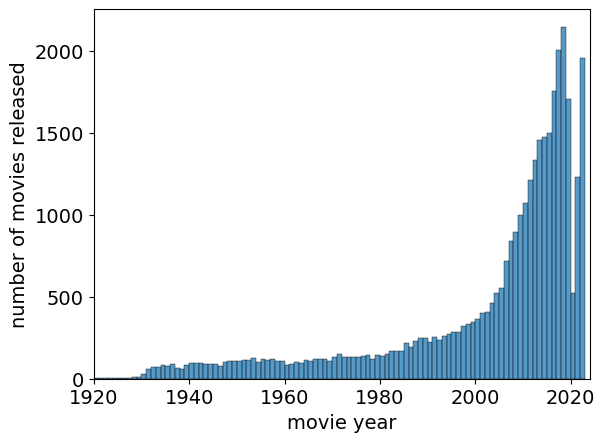

In [5]:
# plot number of movies released each year
plt.rcParams.update({'font.size': 14})
plt.subplots(1,1)
a = sns.histplot(df, x="movie_year", binwidth=1)
a.set(ylabel="number of movies released")
a.set(xlabel="movie year")
a.set(xlim=[1920,2024])

a.figure.savefig('eda_scripts_out\\num_movies_vs_year.png', dpi=300, bbox_inches='tight')


### 1b) most frequent words in BoW representation

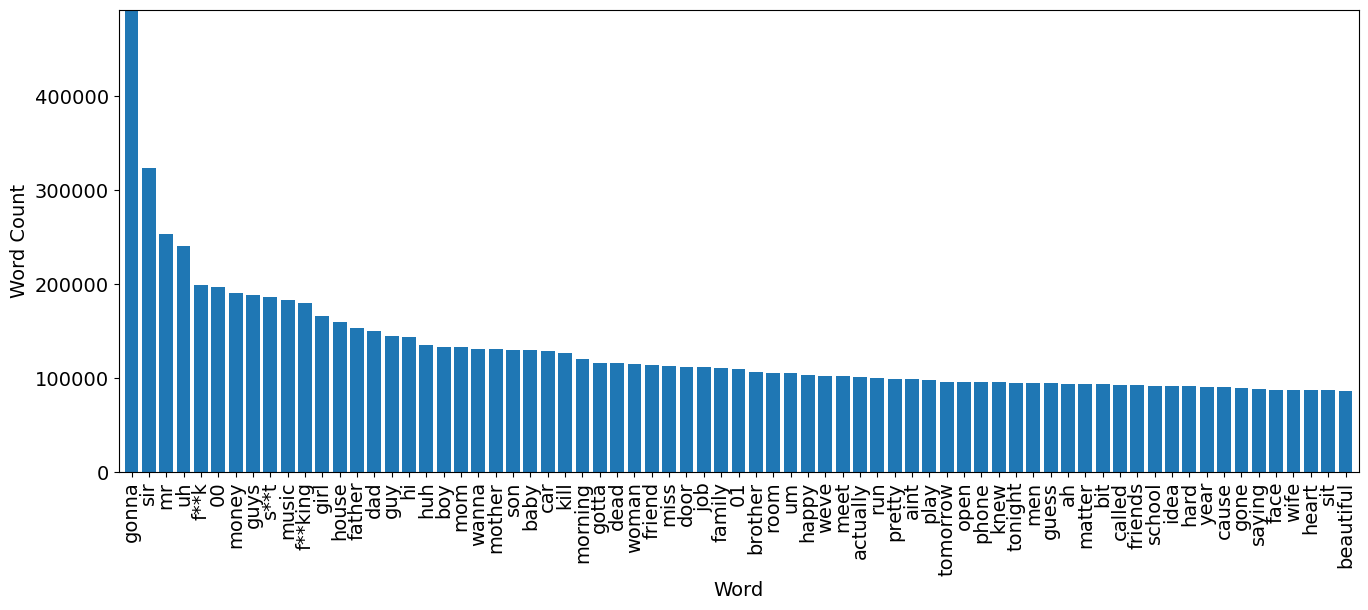

In [6]:
num_words = 70

# compute word count for all words left in the corpus
# and sort the word_key list in descending order
word_count_all_docs = np.array(np.sum(X, axis=0))[0]
indw = np.flip(np.argsort(word_count_all_docs))
word_count_all_docs = word_count_all_docs[indw]
word_keys_sort = [word_key[i] for i in indw[0 : num_words + 1]]

plt.rcParams.update({"font.size": 14})
fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(x=np.arange(0, num_words + 1), height=word_count_all_docs[0 : num_words + 1])
ax.set_ylim(0, np.max(word_count_all_docs) + 1)
ax.set_xlim(-0.75, num_words + 0.75)
ax.set_ylabel("Word Count")
ax.set_xlabel("Word")
ax.set_xticks(np.linspace(0, num_words, num_words + 1))
ax.set_xticklabels(word_keys_sort[0 : num_words + 1])
plt.xticks(rotation=90)

fig.figure.savefig(
    "eda_scripts_out\\word_count_top_100.png", dpi=400, bbox_inches="tight"
)

### 1c) total word count for all movies

In [7]:
total_word_count = np.flip(np.sort(np.array(np.sum(X, axis=1)).reshape(-1)))
sorted_movieid_arg = np.flip(np.argsort(np.array(np.sum(X, axis=1)).reshape(-1)))

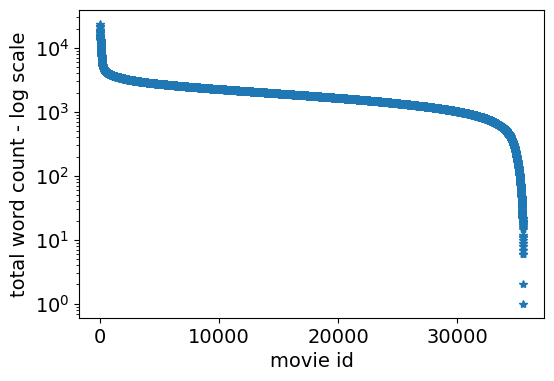

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plt.semilogy(np.linspace(0, X.shape[0], X.shape[0]), total_word_count, "*")
ax.set_xlabel("movie id")
ax.set_ylabel("total word count - log scale")
fig.figure.savefig(
    "eda_scripts_out\\total_word_count_all_movies.png", dpi=400, bbox_inches="tight"
)